TP 1

### Parte 1

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# plt.rcParams['figure.facecolor'] = 'white'
# plt.rcParams['axes.facecolor'] = 'white'
%matplotlib inline

#### Algoritmo de pasaje a coordenadas cromáticas

In [2]:
def chromatic_coord_transform(image: np.array) -> np.array:
    # Get divider 
    rgb_divider = np.sum(image, axis=2)
    print(type(rgb_divider))
    # Expand array
    rgb_divider = rgb_divider[:,:,np.newaxis]
    return np.clip(np.divide(image, rgb_divider, where=rgb_divider != 0), 0, 255)
    
    

In [3]:
# Load images
image_lst = list()
image_lst.append(cv.imread('coord_cromatica/CoordCrom_1.png'))
image_lst.append(cv.imread('coord_cromatica/CoordCrom_2.png'))
image_lst.append(cv.imread('coord_cromatica/CoordCrom_3.png'))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


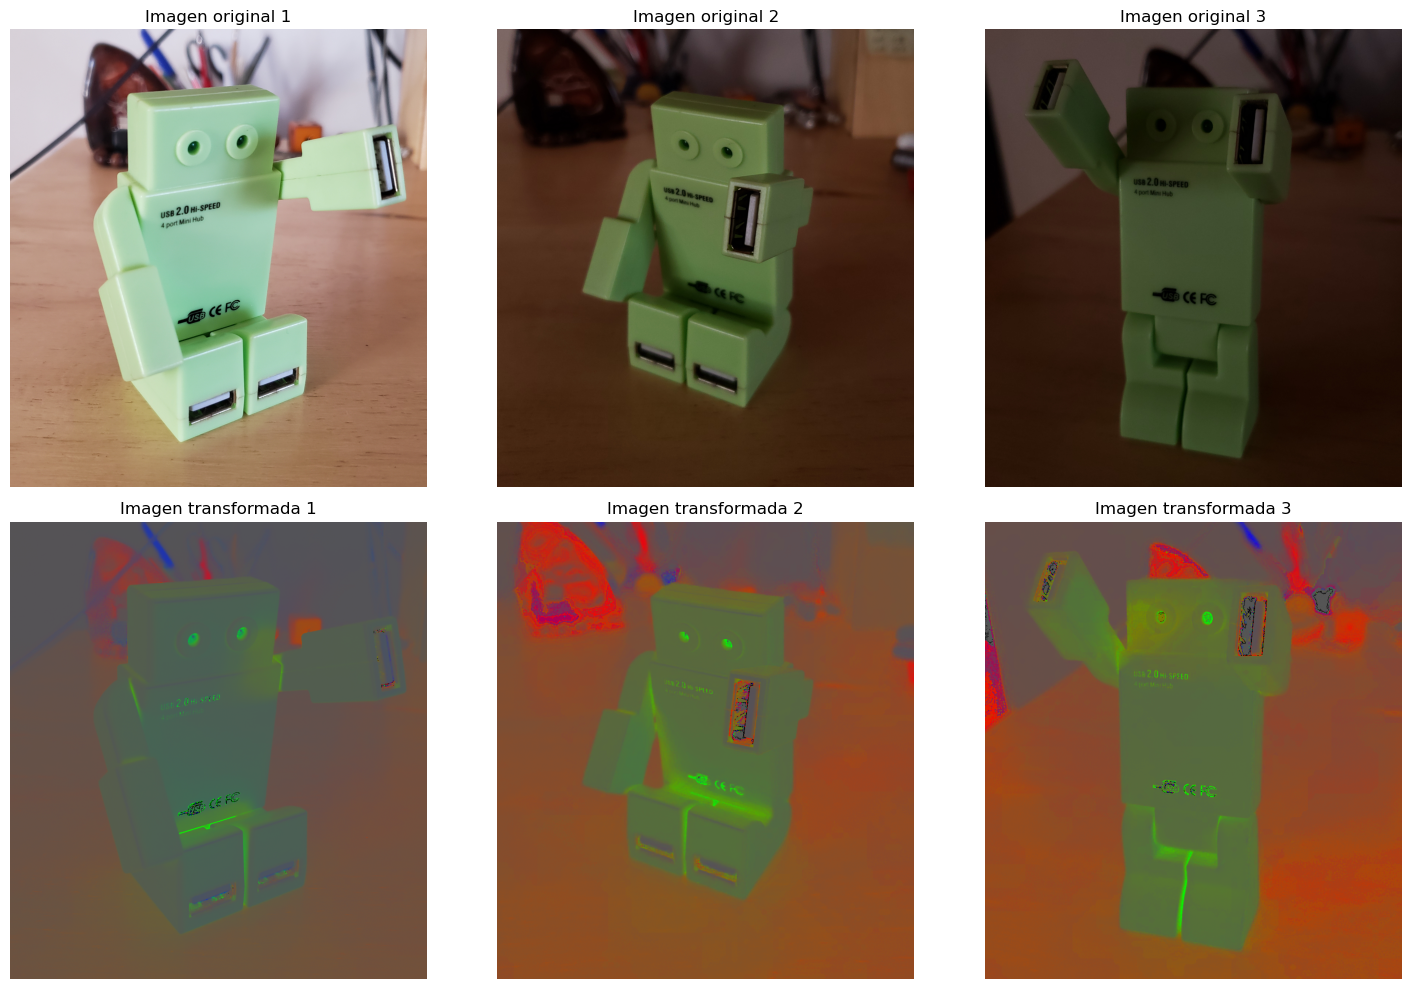

CPU times: user 1.74 s, sys: 205 ms, total: 1.95 s
Wall time: 1.55 s


In [4]:
%%time
fig, axs = plt.subplots(2, 3, figsize=(15,10))

for index, image in enumerate(image_lst):
    axs[0, index].set_title('Imagen original '+ str(index+1))
    axs[0, index].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    axs[0, index].axis('off')
    imageChromatic = chromatic_coord_transform(image)
    axs[1, index].set_title('Imagen transformada '+ str(index+1))
    axs[1, index].imshow(imageChromatic[:,:,::-1])
    axs[1, index].axis('off')


plt.tight_layout()
plt.show()

#### Algoritmo White Patch

In [5]:
def white_patch_transform(image: np.array, percentile=95):
    # Get RGB max value
    use_percentile = False
    rgb_max = np.max(image, axis=(0,1))
    if np.any(rgb_max == 255):
        rgb_max[rgb_max == 255] = 255
        rgb_percentile = np.percentile(image, percentile, axis=(0,1))
        rgb_max[rgb_max == 255] = rgb_percentile[rgb_max == 255]
        print(rgb_max.shape)
        print(rgb_max)
        use_percentile = True
    print(255.0/rgb_max)
    result_image = (255.0/rgb_max) * image
    return np.clip(result_image,0,255).astype(np.uint8), use_percentile
    

In [6]:
# Load images
image_test_lst = list()
image_test_lst.append(cv.imread('white_patch/test_red.png'))
image_test_lst.append(cv.imread('white_patch/test_green.png'))
image_test_lst.append(cv.imread('white_patch/test_blue.png'))


[1.45714286 1.62420382 1.03238866]
[1.49122807 1.02       1.21428571]
[1.275      1.84782609 1.54545455]


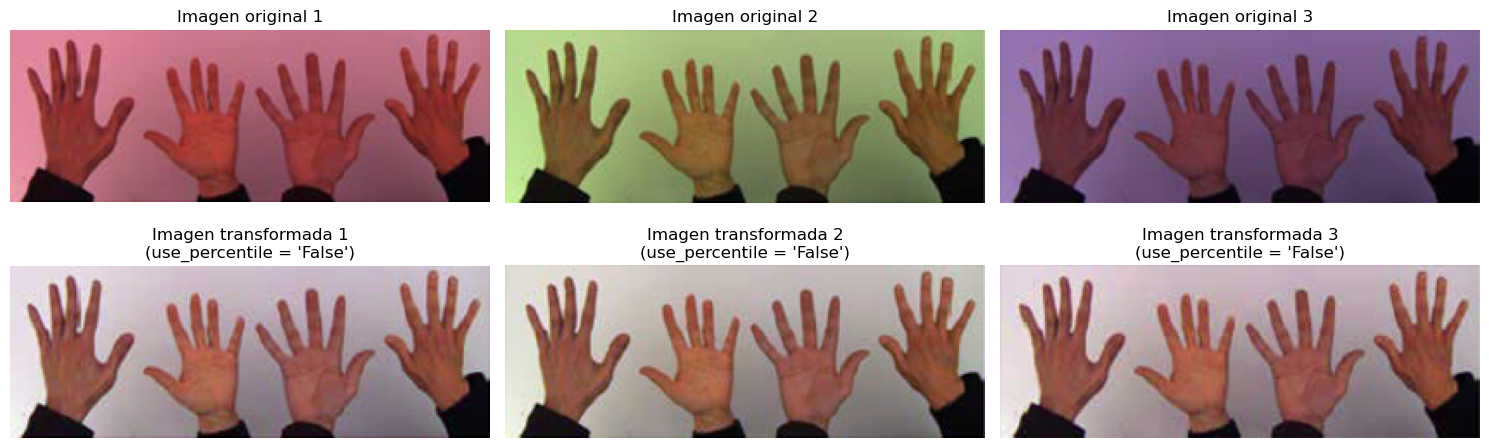

In [7]:
fig, axs = plt.subplots(2, 3, figsize=(15,5))

for index, image in enumerate(image_test_lst):
    axs[0, index].set_title('Imagen original '+ str(index+1))
    axs[0, index].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    axs[0, index].axis('off')
    imageChromatic, use_percentile = white_patch_transform(image)
    axs[1, index].set_title('Imagen transformada '+ str(index+1) + "\n(use_percentile = '" + str(use_percentile) + "')")
    axs[1, index].imshow(imageChromatic[:,:,::-1])
    axs[1, index].axis('off')


plt.tight_layout()
plt.show()

In [8]:
image_wp_lst = list()
image_wp_lst.append(cv.imread('white_patch/wp_red.png'))
# image_wp_lst.append(cv.imread('white_patch/wp_red2.jpg'))
image_wp_lst.append(cv.imread('white_patch/wp_blue.jpg'))
image_wp_lst.append(cv.imread('white_patch/wp_green.png'))
# image_wp_lst.append(cv.imread('white_patch/wp_green2.jpg'))

(3,)
[122 134 255]
[2.09016393 1.90298507 1.        ]
(3,)
[254  86 117]
[1.00393701 2.96511628 2.17948718]
[1.64516129 1.01190476 2.02380952]


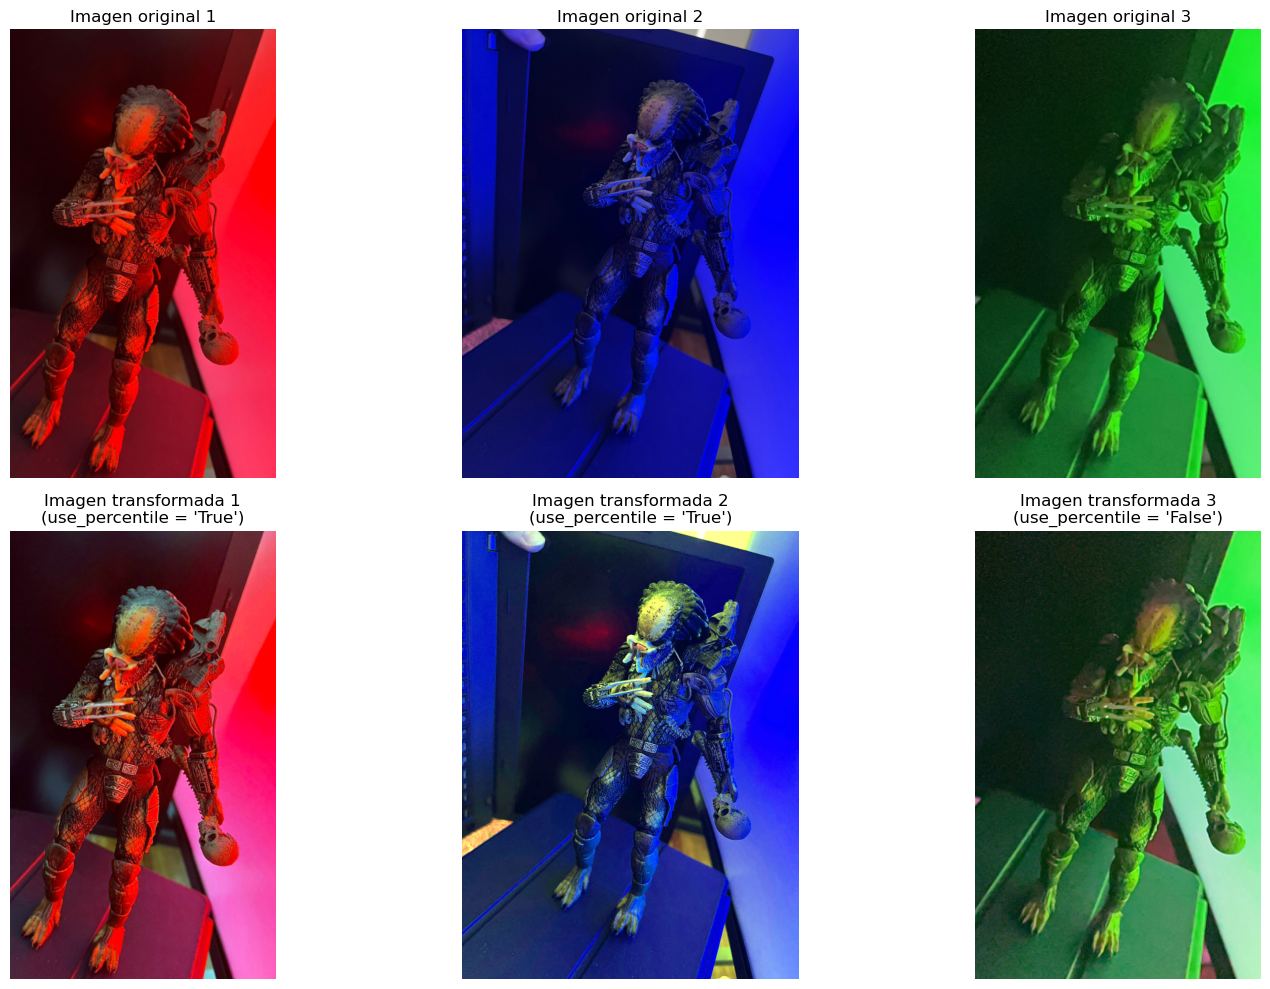

In [9]:
fig, axs = plt.subplots(2, len(image_wp_lst), figsize=(16,10))

for index, image in enumerate(image_wp_lst):
    axs[0, index].set_title('Imagen original '+ str(index+1))
    axs[0, index].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    axs[0, index].axis('off')
    imageChromatic, use_percentile = white_patch_transform(image, percentile=99)
    axs[1, index].set_title('Imagen transformada '+ str(index+1) + "\n(use_percentile = '" + str(use_percentile) + "')")
    axs[1, index].imshow(imageChromatic[:,:,::-1])
    axs[1, index].axis('off')


plt.tight_layout()
plt.show()

In [10]:
image_wp_lst_2 = list()
image_wp_lst_2.append(cv.imread('white_patch/wp_red2.jpg'))
# image_wp_lst_2.append(cv.imread('white_patch/wp_blue.jpg'))
# image_wp_lst_2.append(cv.imread('white_patch/wp_green2.png'))
image_wp_lst_2.append(cv.imread('white_patch/wp_green2.jpg'))

(3,)
[203 201 255]
[1.25615764 1.26865672 1.        ]
(3,)
[172 255 170]
[1.48255814 1.         1.5       ]


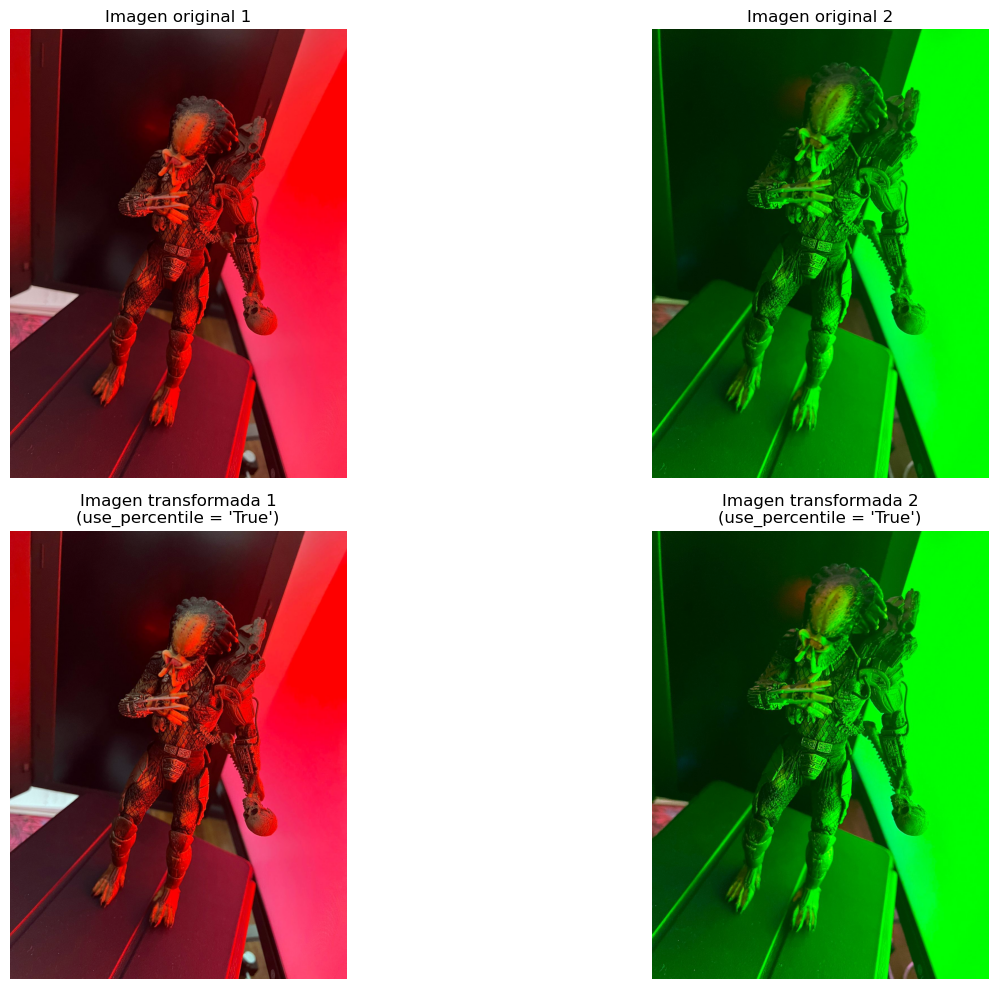

In [11]:
fig, axs = plt.subplots(2, len(image_wp_lst_2), figsize=(16,10))

for index, image in enumerate(image_wp_lst_2):
    axs[0, index].set_title('Imagen original '+ str(index+1))
    axs[0, index].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    axs[0, index].axis('off')
    imageChromatic, use_percentile = white_patch_transform(image, percentile=99)
    axs[1, index].set_title('Imagen transformada '+ str(index+1) + "\n(use_percentile = '" + str(use_percentile) + "')")
    axs[1, index].imshow(imageChromatic[:,:,::-1])
    axs[1, index].axis('off')


plt.tight_layout()
plt.show()

##### Veamos el efecto del cambio de percentil en los casos en donde no podemos utilizar el maximo valor de RGB.

In [12]:
def show_wp_image(percentile):
    # print(percentile)
    image, use_percentile = white_patch_transform(image_wp_lst[1], percentile=percentile)
    plt.imshow(image[:,:,::-1])
    # plt.figure(figsize=(10,5))
    plt.axis('off')
    plt.tight_layout()
    plt.show()

threshold_slider = widgets.IntSlider(value=90, min=1, max=100, step=1, description='Percentile') 
   
widgets.interact(show_wp_image, percentile=threshold_slider)    


interactive(children=(IntSlider(value=90, description='Percentile', min=1), Output()), _dom_classes=('widget-i…

<function __main__.show_wp_image(percentile)>

In [13]:
# imageCoord = np.zeros(imageRGB.shape)
# for i in range(imageRGB.shape[0]):
#     for j in range(imageRGB.shape[1]):
#         XYZ = np.sum(imageRGB[i,j,:])
#         imageCoord[i,j,:] = imageRGB[i,j,:]/XYZ if XYZ != 0 else 0       
# imageCoord = imageCoord

### Parte 2

In [14]:
image_lst = list()
image_lst.append(cv.imread("img1_tp.png", cv.IMREAD_GRAYSCALE))
image_lst.append(cv.imread("img2_tp.png", cv.IMREAD_GRAYSCALE))

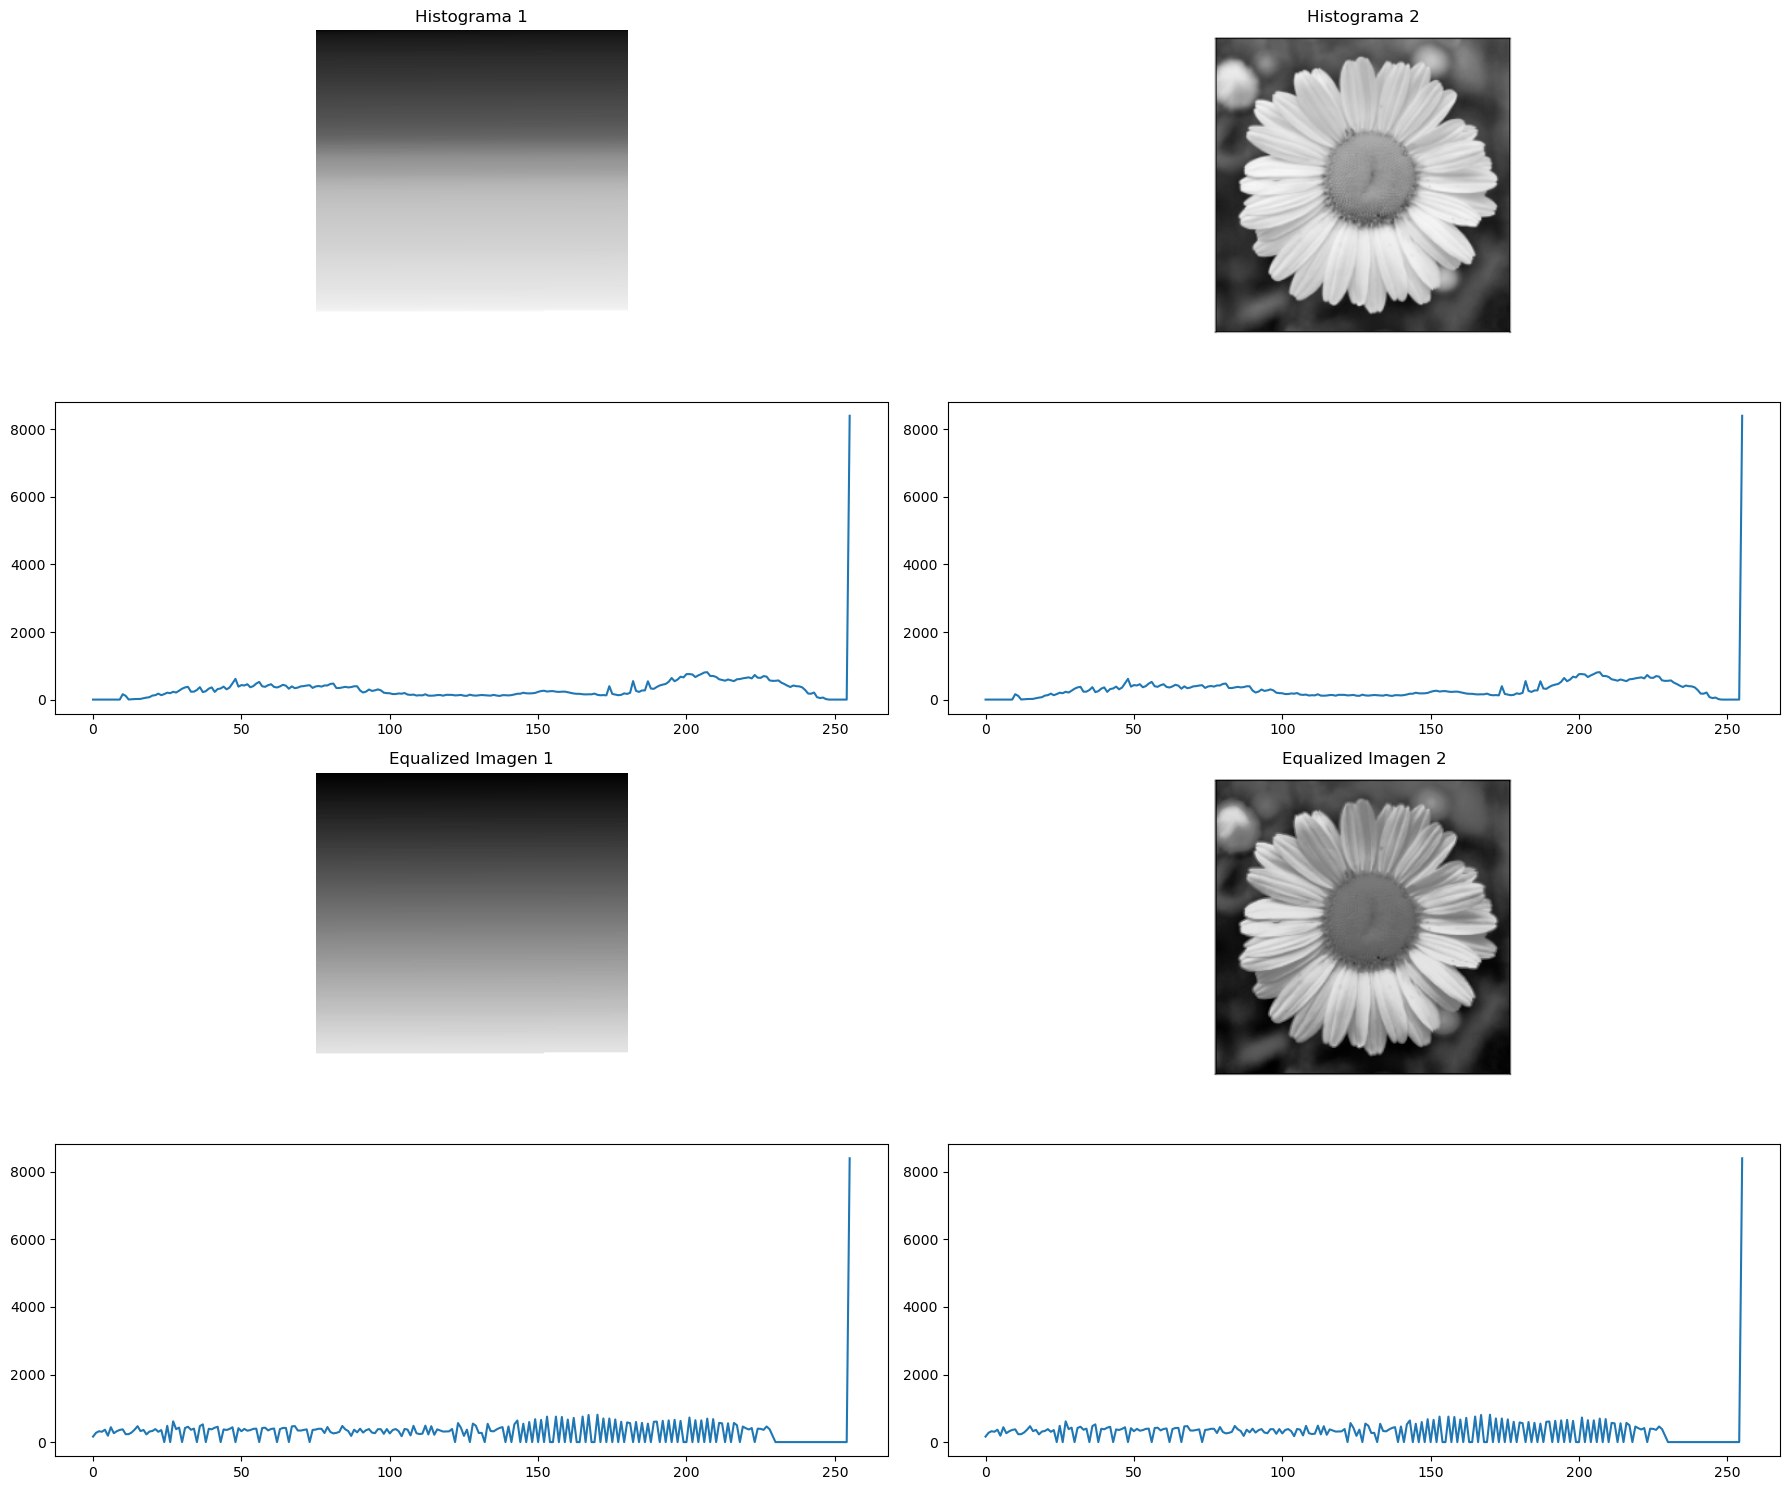

In [15]:
fig, axs = plt.subplots(4, 2, figsize=(18,15))

for index, image in enumerate(image_lst):
    axs[0, index].set_title('Imagen '+ str(index+1))
    axs[0, index].imshow(image, cmap='gray')
    axs[0, index].axis('off')
    axs[0, index].set_title('Histograma '+ str(index+1))
    hist, bins = np.histogram(image.ravel(), 256, [0, 256])
    axs[1, index].plot(hist)
    axs[2, index].set_title('Equalized Imagen '+ str(index+1))
    equalized_image = cv.equalizeHist(image)
    axs[2, index].imshow(equalized_image, cmap='gray')
    axs[2, index].axis('off')
    hist, bins = np.histogram(equalized_image.ravel(), 256, [0, 256])
    axs[3, index].plot(hist)

plt.tight_layout()
plt.show()

In [16]:
image_1 = image_lst[0]
image_2 = image_lst[1]
image_1_flat = image_1.flatten()
image_2_flat = image_2.flatten()
# image_2 = image_2.sort()
image_2_flat_sort = np.sort(image_2_flat)
print("Image 1 " + str(image_1.shape))
print("Image 2 " + str(image_2.shape))
if np.array_equal(image_1_flat,image_2_flat_sort):
    print("There are equal")
else:
    print("There are some difference")

Image 1 (288, 287)
Image 2 (288, 287)
There are equal


Conclusiones:
Se observa que los histogramas son indeticos por lo tanto no se podria usar el histograma de la imagen como feauter para un problema de clasificación

#### Para la imagen segmentacion.png analice el histograma de los canales RGB. Segmente algunos de los elementos presentes en la imagen (agua, cielo, tierra) y muestre, aplicando mascaras, las regiones en imágenes separadas

In [17]:
seg_image = cv.imread("segmentacion.png")
rgb_seg_image = cv.cvtColor(seg_image, cv.COLOR_BGR2RGB)

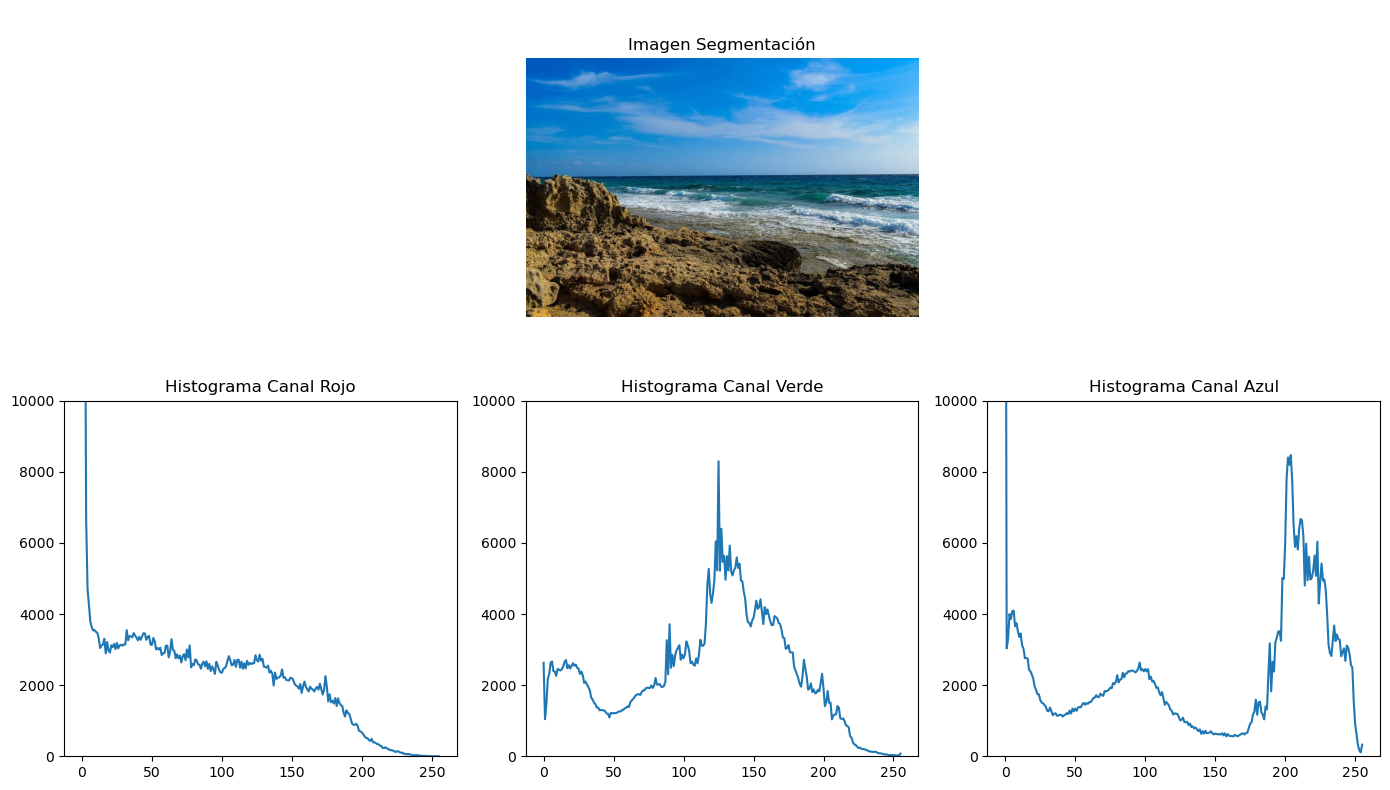

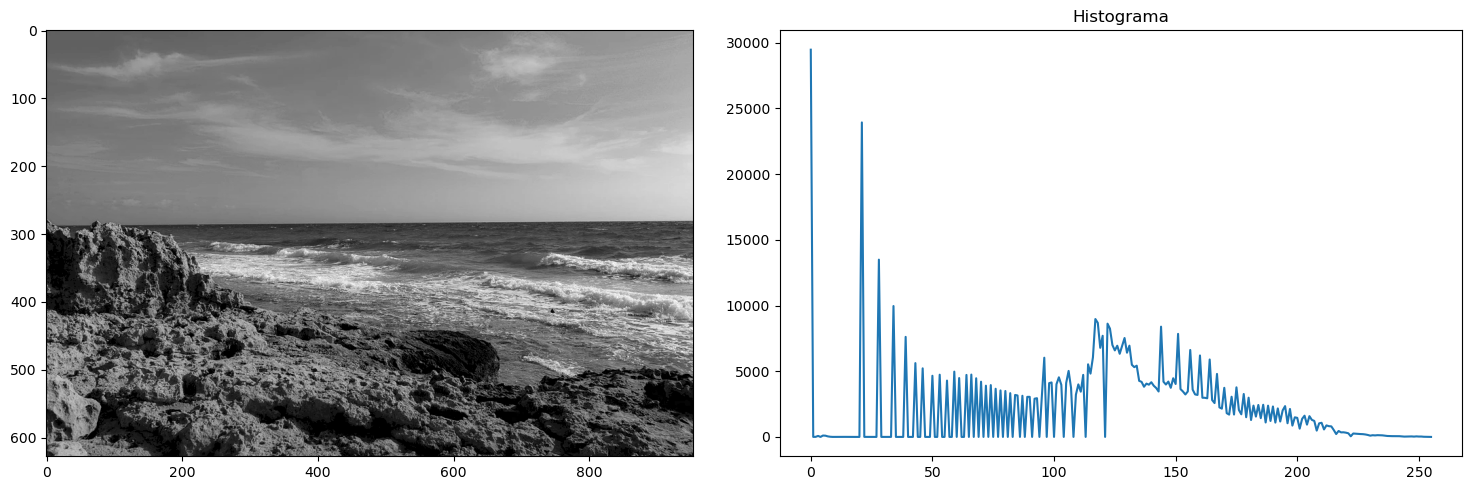

In [153]:
fig, axs = plt.subplots(2, 3, figsize=(14,8))


axs[0, 1].set_title('Imagen Segmentación')
axs[0, 1].imshow(rgb_seg_image)
axs[0, 1].axis('off')
axs[0, 0].axis('off')
axs[0, 2].axis('off')

axs[1, 0].set_title('Histograma Canal Rojo')
axs[1, 1].set_title('Histograma Canal Verde')
axs[1, 2].set_title('Histograma Canal Azul')
for index in range(rgb_seg_image.shape[2]):
    hist, bins = np.histogram(rgb_seg_image[:,:,index].ravel(), 256, (0, 256), density=False)
    axs[1, index].set_ylim(0, 10000)
    axs[1, index].plot(hist)

plt.tight_layout()
plt.show()

fig1 = plt.figure(figsize = (15,5))
seg_image_gray = cv.imread("segmentacion.png", cv.IMREAD_GRAYSCALE)
hist, bins = np.histogram(seg_image_gray.ravel(), 256, (0, 256))
cv_hist = cv.calcHist([seg_image_gray.ravel()], [0], None, [256], [0,256])
plt.subplot(121).imshow(seg_image_gray, cmap='gray')
plt.subplot(122).set_title('Histograma')
plt.subplot(122).plot(cv_hist)


plt.tight_layout()
plt.show()


CPU times: user 2 μs, sys: 0 ns, total: 2 μs
Wall time: 4.77 μs


(-0.5, 952.5, 627.5, -0.5)

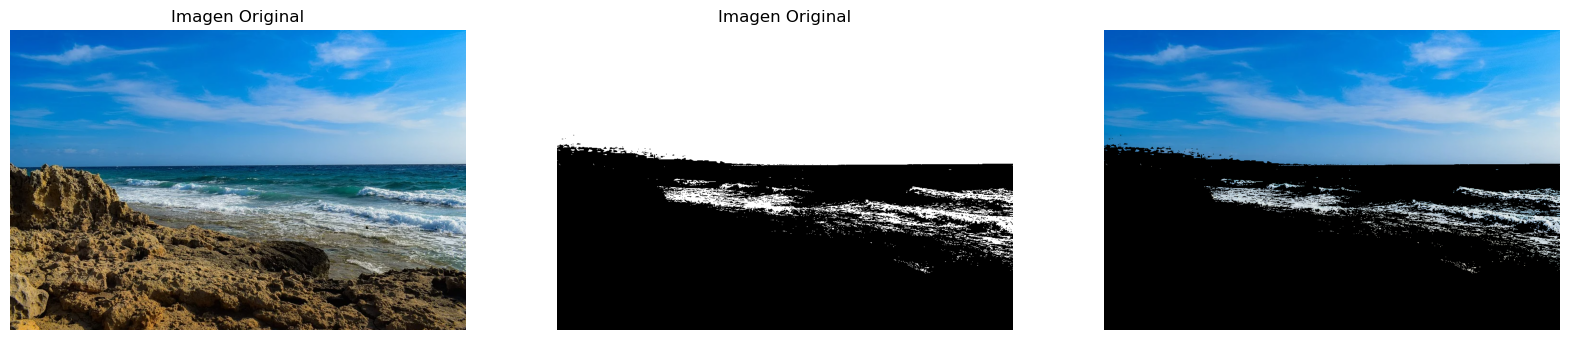

In [242]:
%time
ret, seg_image_bin = cv.threshold(rgb_seg_image[:,:,2], 185 , 255, cv.THRESH_BINARY)


figure = plt.figure(figsize=(20,15))

plt.subplot(131).set_title('Imagen Original')
plt.subplot(131).imshow(rgb_seg_image)
plt.subplot(131).axis('off')


plt.subplot(132).set_title('Imagen Original')
plt.subplot(132).imshow(seg_image_bin, cmap='gray')
plt.subplot(132).axis('off')


segmented_img = cv.bitwise_and(rgb_seg_image, rgb_seg_image, mask=seg_image_bin)
plt.subplot(133).imshow(segmented_img)
plt.subplot(133).axis('off')


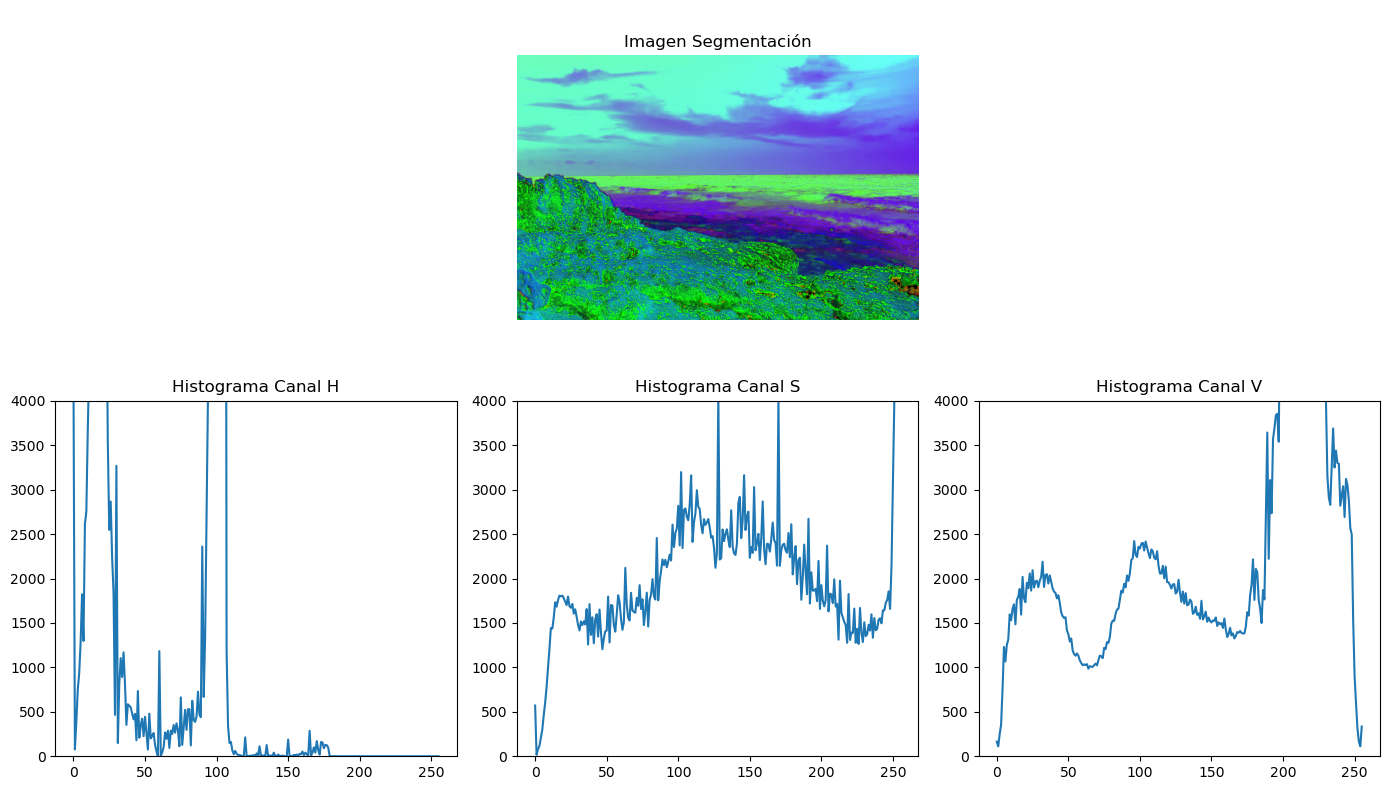

In [213]:
fig, axs = plt.subplots(2, 3, figsize=(14,8))
seg_image_hsv = cv.cvtColor(rgb_seg_image, cv.COLOR_RGB2HSV)

axs[0, 1].set_title('Imagen Segmentación')
axs[0, 1].imshow(seg_image_hsv)
axs[0, 1].axis('off')
axs[0, 0].axis('off')
axs[0, 2].axis('off')

axs[1, 0].set_title('Histograma Canal H')
axs[1, 1].set_title('Histograma Canal S')
axs[1, 2].set_title('Histograma Canal V')
for index in range(seg_image_hsv.shape[2]):
    hist, bins = np.histogram(seg_image_hsv[:,:,index].ravel(), 256, (0, 256), density=False)
    axs[1, index].set_ylim(0, 4000)
    axs[1, index].plot(hist)

plt.tight_layout()
plt.show()


CPU times: user 3 μs, sys: 0 ns, total: 3 μs
Wall time: 4.29 μs


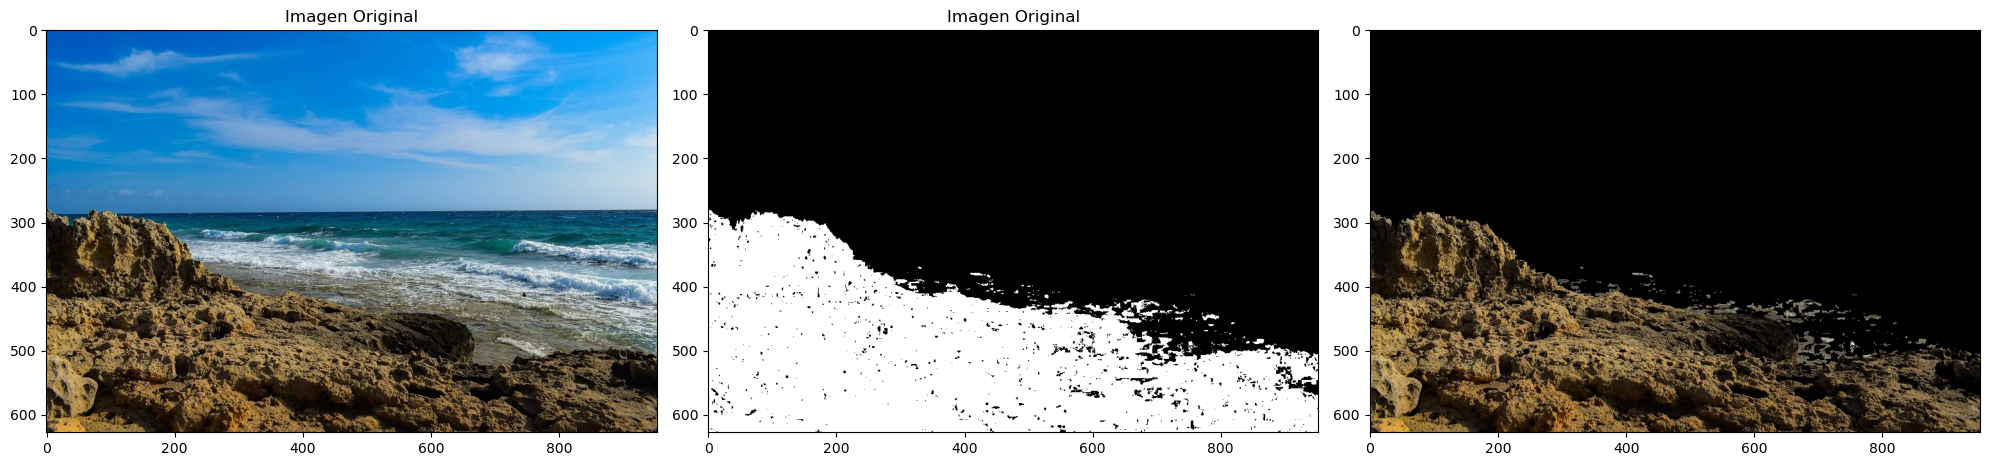

In [241]:
%time
ret, seg_image_bin = cv.threshold(seg_image_hsv[:,:,0], 23 , 255, cv.THRESH_BINARY_INV)
# ret, seg_image_bin = cv.threshold(seg_image_hsv[:,:,2], 0 , 255, cv.THRESH_BINARY_INV+cv.THRESH_OTSU)


figure = plt.figure(figsize=(20,15))

plt.subplot(131).set_title('Imagen Original')
plt.subplot(131).imshow(rgb_seg_image)
# plt.subplot(131).axis('off')


plt.subplot(132).set_title('Imagen Original')
plt.subplot(132).imshow(seg_image_bin, cmap='gray')
# plt.subplot(132).axis('off')


segmented_img = cv.bitwise_and(rgb_seg_image, rgb_seg_image, mask=seg_image_bin)
plt.subplot(133).imshow(segmented_img)
# plt.subplot(133).axis('off')

plt.tight_layout()
plt.show()

CPU times: user 3 μs, sys: 0 ns, total: 3 μs
Wall time: 5.48 μs


(-0.5, 952.5, 627.5, -0.5)

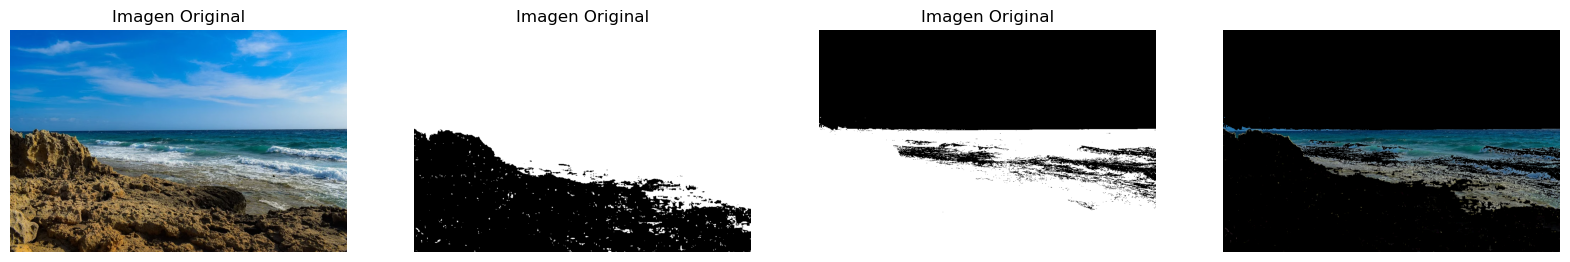

In [243]:
%time
ret, hsv_seg_image_bin = cv.threshold(seg_image_hsv[:,:,0], 25 , 255, cv.THRESH_BINARY)
ret, seg_image_bin = cv.threshold(rgb_seg_image[:,:,2], 175 , 255, cv.THRESH_BINARY_INV)


figure = plt.figure(figsize=(20,15))

plt.subplot(141).set_title('Imagen Original')
plt.subplot(141).imshow(rgb_seg_image)
plt.subplot(141).axis('off')


plt.subplot(142).set_title('Imagen Original')
plt.subplot(142).imshow(hsv_seg_image_bin, cmap='gray')
plt.subplot(142).axis('off')

plt.subplot(143).set_title('Imagen Original')
plt.subplot(143).imshow(seg_image_bin, cmap='gray')
plt.subplot(143).axis('off')


# segmented_img = cv.bitwise_and(rgb_seg_image, rgb_seg_image, mask=hsv_seg_image_bin)
img_mask = cv.bitwise_and(hsv_seg_image_bin, seg_image_bin)
plt.subplot(144).imshow(segmented_img, cmap='gray')
plt.subplot(144).axis('off')

segmented_img = cv.bitwise_and(rgb_seg_image, rgb_seg_image, mask=img_mask)
plt.subplot(144).imshow(segmented_img, cmap='gray')
plt.subplot(144).axis('off')